In [1]:
from google.colab import files

# upload a file
upload = files.upload()

Saving Sparkling.csv to Sparkling (1).csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression

from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

from sklearn.metrics import root_mean_squared_error

In [3]:
sparkling_df = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'], index_col = ['YearMonth'] )
sparkling_df

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670


In [4]:
sparkling_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [5]:
sparkling_df[sparkling_df['Sparkling'].isna() == True]

,Sparkling
YearMonth,


* sparkling_df has no missing values

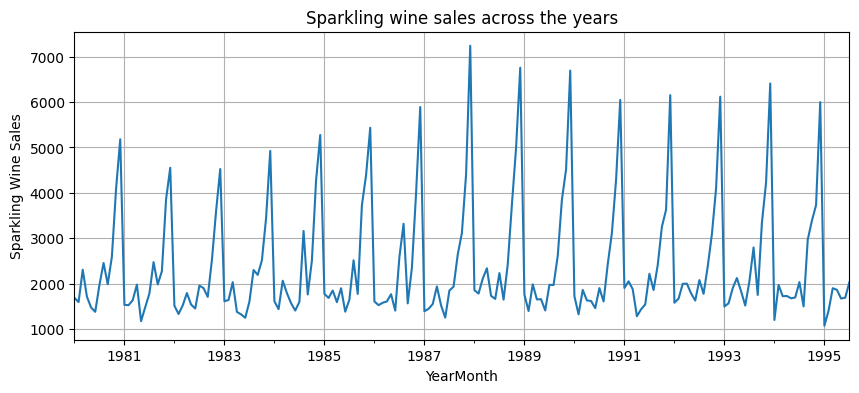

In [6]:
plt.figure(figsize = (10, 4))
sparkling_df['Sparkling'].plot()
plt.xlabel('YearMonth')
plt.ylabel('Sparkling Wine Sales')
plt.grid()
plt.title('Sparkling wine sales across the years')
plt.show()

* The sparkling wine sales shows level, no trend but seasonality.

In [7]:
sparkling_df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [8]:
sparkling_additive_decompose = seasonal_decompose(sparkling_df, model = 'additive', period = 12)

In [9]:
sparkling_additive_decompose.trend.head(10)

,trend
YearMonth,
1980-01-01,NaN
1980-02-01,NaN
1980-03-01,NaN
1980-04-01,NaN
1980-05-01,NaN
1980-06-01,NaN
1980-07-01,2360.666667
1980-08-01,2351.333333
1980-09-01,2320.541667


In [10]:
sparkling_additive_decompose.seasonal.head(10)

,seasonal
YearMonth,
1980-01-01,-854.260599
1980-02-01,-830.350678
1980-03-01,-592.356630
1980-04-01,-658.490559
1980-05-01,-824.416154
1980-06-01,-967.434011
1980-07-01,-465.502265
1980-08-01,-214.332821
1980-09-01,-254.677265


In [11]:
sparkling_additive_decompose.resid.head(10)

,resid
YearMonth,
1980-01-01,NaN
1980-02-01,NaN
1980-03-01,NaN
1980-04-01,NaN
1980-05-01,NaN
1980-06-01,NaN
1980-07-01,70.835599
1980-08-01,315.999487
1980-09-01,-81.864401


<Figure size 1000x600 with 0 Axes>

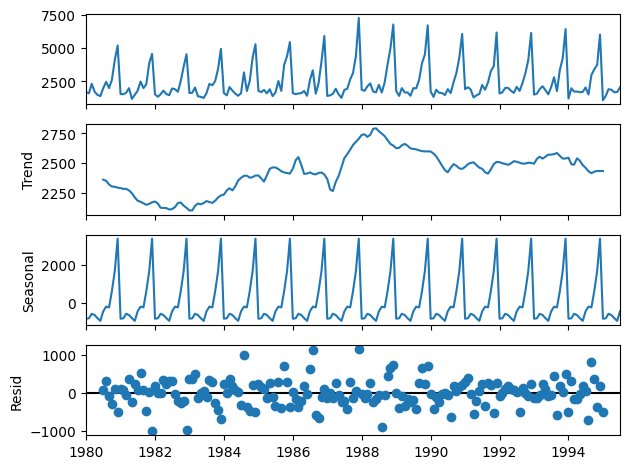

In [12]:
plt.figure(figsize = (10, 6))
sparkling_additive_decompose.plot()
plt.show()

**Additive decomposition of the sparkling wine sales -**
  * The sparkling wine sales has varying trend (downward trend till 1983 followed by upward trend till 1986 followed by a downward trend till 1987 followed by upward trend till 1989 followed by downward trend till 1990 followed by no such uptrend or downtrend) and exhibits seasonality.
  * The resid (error component) exhibits some influence of the systemic component (seasonality).

In [13]:
sparkling_multiplicative_decompose = seasonal_decompose(sparkling_df, model = 'multiplicative', period = 12)

In [14]:
sparkling_multiplicative_decompose.trend.head(10)

,trend
YearMonth,
1980-01-01,NaN
1980-02-01,NaN
1980-03-01,NaN
1980-04-01,NaN
1980-05-01,NaN
1980-06-01,NaN
1980-07-01,2360.666667
1980-08-01,2351.333333
1980-09-01,2320.541667


In [15]:
sparkling_multiplicative_decompose.seasonal.head(10)

,seasonal
YearMonth,
1980-01-01,0.649843
1980-02-01,0.659214
1980-03-01,0.757440
1980-04-01,0.730351
1980-05-01,0.660609
1980-06-01,0.603468
1980-07-01,0.809164
1980-08-01,0.918822
1980-09-01,0.894367


In [16]:
sparkling_multiplicative_decompose.resid.head(10)

,resid
YearMonth,
1980-01-01,NaN
1980-02-01,NaN
1980-03-01,NaN
1980-04-01,NaN
1980-05-01,NaN
1980-06-01,NaN
1980-07-01,1.029230
1980-08-01,1.135407
1980-09-01,0.955954


<Figure size 1000x600 with 0 Axes>

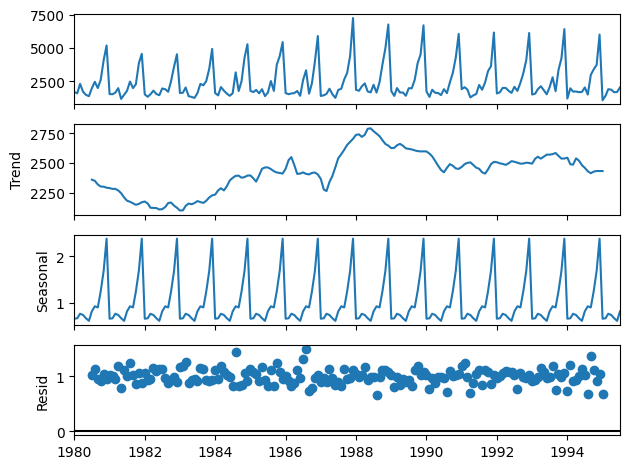

In [17]:
plt.figure(figsize = (10, 6))
sparkling_multiplicative_decompose.plot()
plt.show()

**Multiplicative decomposition of the sparkling wine sales -**
  * The sparkling wine sales has varying trend (downward trend till 1983 followed by upward trend till 1986 followed by a downward trend till 1987 followed by upward trend till 1989 followed by downward trend till 1990 followed by no such uptrend or downtrend) and exhibits seasonality.
  * The resid (error component) is almost flat as compared to the resid of additive decomposition model.

**Conclusion** : Multiplicative model is the correct decomposition of the rosesparkling wine sales  

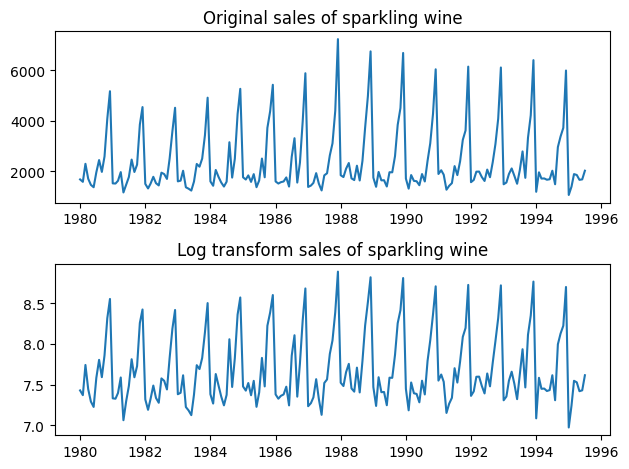

In [18]:
sparkling2_df = sparkling_df.copy()

sparkling2_df['Sparkling'] = np.log(sparkling_df)

plt.subplot(2, 1, 1)
plt.plot(sparkling_df)
plt.title("Original sales of sparkling wine")

plt.subplot(2, 1, 2)
plt.plot(sparkling2_df)
plt.title("Log transform sales of sparkling wine")

plt.tight_layout()

plt.show()

In [19]:
#Dividing rose_df into train and test set

sparkling_train_df = sparkling_df[:'1990-12-01']
sparkling_test_df = sparkling_df['1991-01-01':]

In [20]:
sparkling_train_df

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116


In [21]:
sparkling_test_df

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432
1991-06-01,1540
1991-07-01,2214
1991-08-01,1857
1991-09-01,2408


In [22]:
train_time = [i+1 for i in range (len(sparkling_train_df))]
test_time = [len(sparkling_train_df)+1+i for i in range (len(sparkling_test_df))]

In [23]:
sparkling_train_df['time'] = train_time
sparkling_train_df

<ipython-input-23-bc0d7d8cc8f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sparkling_train_df['time'] = train_time


,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5
...,...,...
1990-08-01,1605,128
1990-09-01,2424,129
1990-10-01,3116,130


In [24]:
sparkling_test_df['time'] = test_time
sparkling_test_df

<ipython-input-24-359aafa2dcc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sparkling_test_df['time'] = test_time


,Sparkling,time
YearMonth,,
1991-01-01,1902,133
1991-02-01,2049,134
1991-03-01,1874,135
1991-04-01,1279,136
1991-05-01,1432,137
1991-06-01,1540,138
1991-07-01,2214,139
1991-08-01,1857,140
1991-09-01,2408,141


In [25]:
sparkling_train_lr = sparkling_train_df.copy()
sparkling_test_lr = sparkling_test_df.copy()

**Linear Regression for predicting the future sparkling wine sales**

In [26]:
# Linear Regression

lr = LinearRegression()
lr.fit(sparkling_train_lr[['time']], sparkling_train_lr['Sparkling'])

LinearRegression()

In [27]:
lr_test_prediction = lr.predict(sparkling_test_lr[['time']])
sparkling_test_lr['lr_test_prediction'] = lr_test_prediction
sparkling_test_lr

,Sparkling,time,lr_test_prediction
YearMonth,,,
1991-01-01,1902,133,2791.652093
1991-02-01,2049,134,2797.484752
1991-03-01,1874,135,2803.317410
1991-04-01,1279,136,2809.150069
1991-05-01,1432,137,2814.982727
1991-06-01,1540,138,2820.815386
1991-07-01,2214,139,2826.648044
1991-08-01,1857,140,2832.480703
1991-09-01,2408,141,2838.313361


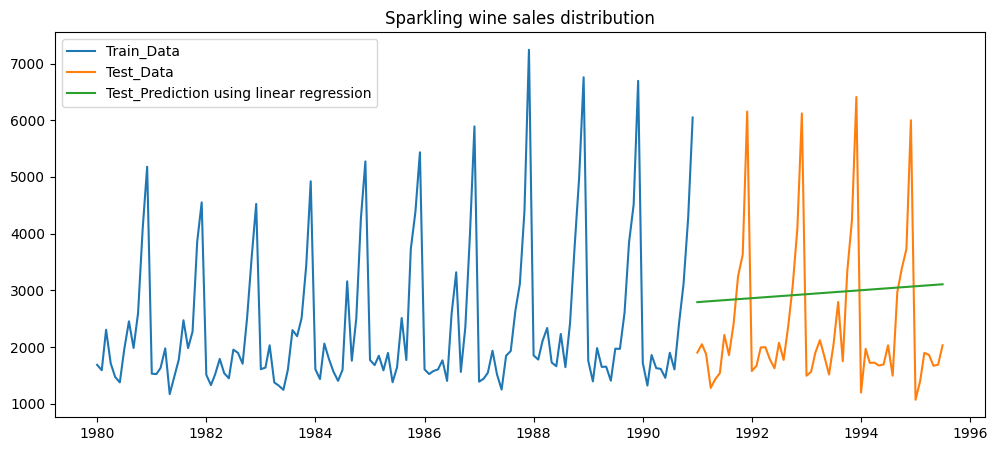

In [28]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling_train_lr['Sparkling'], label = 'Train_Data')
plt.plot(sparkling_test_lr['Sparkling'], label = 'Test_Data')
plt.plot(sparkling_test_lr['lr_test_prediction'], label = 'Test_Prediction using linear regression')
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

In [29]:
rmse_lr_test = root_mean_squared_error(sparkling_test_lr['Sparkling'], sparkling_test_lr['lr_test_prediction'])

In [30]:
error_df = pd.DataFrame({'Prediction_error_on_Test_Data': [rmse_lr_test]}, index = ['Linear Regression'])
error_df

,Prediction_error_on_Test_Data
Linear Regression,1389.135175


**Predicting the future wine sales using the simple average**

In [31]:
# Simple Average

sparkling_sa_train = sparkling_train_df.copy()
saparkling_sa_test = sparkling_test_df.copy()

In [32]:
saparkling_sa_test['Simple_Average_Prediction'] = sparkling_sa_train['Sparkling'].mean()
saparkling_sa_test

,Sparkling,time,Simple_Average_Prediction
YearMonth,,,
1991-01-01,1902,133,2403.780303
1991-02-01,2049,134,2403.780303
1991-03-01,1874,135,2403.780303
1991-04-01,1279,136,2403.780303
1991-05-01,1432,137,2403.780303
1991-06-01,1540,138,2403.780303
1991-07-01,2214,139,2403.780303
1991-08-01,1857,140,2403.780303
1991-09-01,2408,141,2403.780303


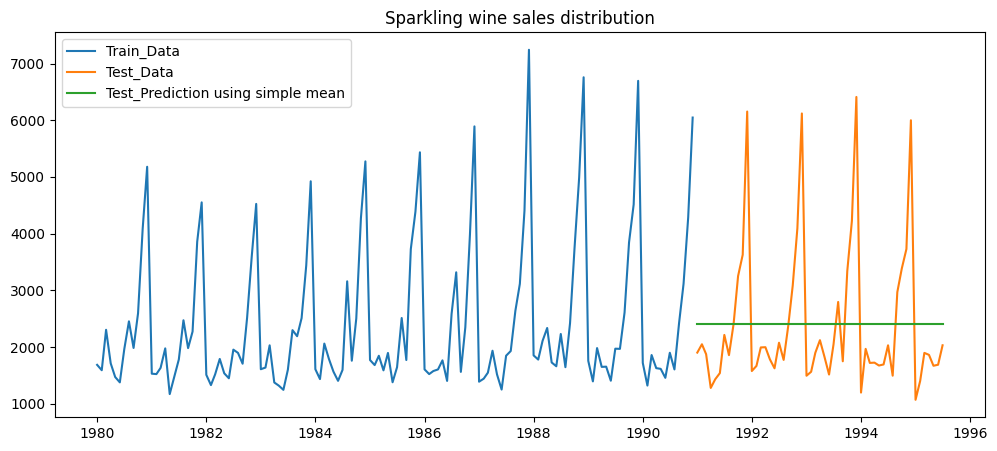

In [33]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling_sa_train['Sparkling'], label = 'Train_Data')
plt.plot(saparkling_sa_test['Sparkling'], label = 'Test_Data')
plt.plot(saparkling_sa_test['Simple_Average_Prediction'], label = 'Test_Prediction using simple mean')
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

In [34]:
rmse_sa_test = root_mean_squared_error(saparkling_sa_test['Sparkling'], saparkling_sa_test['Simple_Average_Prediction'])

error_sa = pd.DataFrame({'Prediction_error_on_Test_Data': [rmse_sa_test]}, index = ['Simple Average'])
error_sa

,Prediction_error_on_Test_Data
Simple Average,1275.081804


In [35]:
error_df = pd.concat([error_df, error_sa])
error_df

,Prediction_error_on_Test_Data
Linear Regression,1389.135175
Simple Average,1275.081804


**Predicting the future wine sales using the moving average**

In [36]:
# Moving Average

sparkling_ma_df = sparkling_df.copy()
sparkling_ma_df

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670


In [37]:
sparkling_ma_df['Trailing_Moving_Average_2'] = sparkling_ma_df['Sparkling'].rolling(2).mean()
sparkling_ma_df['Trailing_Moving_Average_4'] = sparkling_ma_df['Sparkling'].rolling(4).mean()
sparkling_ma_df['Trailing_Moving_Average_6'] = sparkling_ma_df['Sparkling'].rolling(6).mean()
sparkling_ma_df['Trailing_Moving_Average_8'] = sparkling_ma_df['Sparkling'].rolling(8).mean()
sparkling_ma_df['Trailing_Moving_Average_10'] = sparkling_ma_df['Sparkling'].rolling(10).mean()
sparkling_ma_df

,Sparkling,Trailing_Moving_Average_2,Trailing_Moving_Average_4,Trailing_Moving_Average_6,Trailing_Moving_Average_8,Trailing_Moving_Average_10
YearMonth,,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN,NaN
...,...,...,...,...,...,...
1995-03-01,1897,1649.5,2592.00,2913.666667,2743.125,2566.9
1995-04-01,1862,1879.5,1557.75,2659.833333,2789.000,2583.8
1995-05-01,1670,1766.0,1707.75,2316.666667,2626.750,2547.7


In [38]:
sparkling_ma_train_df = sparkling_ma_df[:'1990-12-01']
sparkling_ma_test_df = sparkling_ma_df['1991-01-01':]

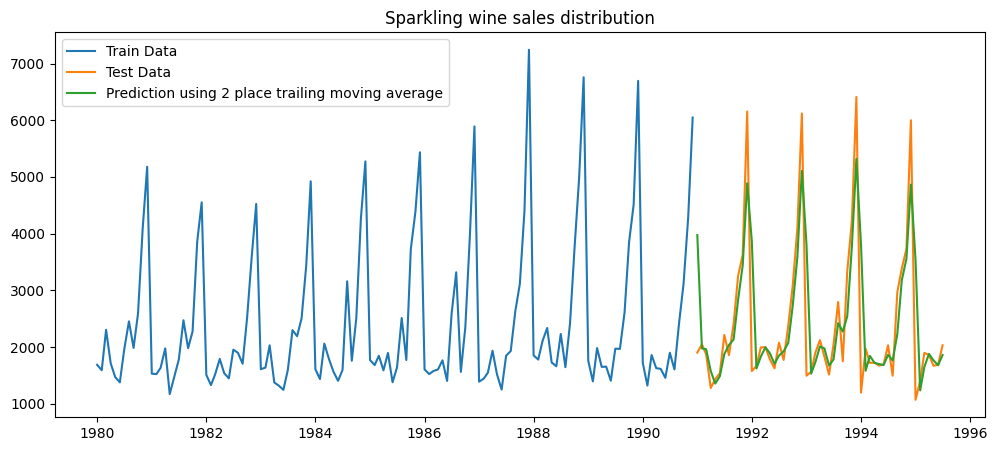

In [39]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling_ma_train_df['Sparkling'], label = 'Train Data')
plt.plot(sparkling_ma_test_df['Sparkling'], label = 'Test Data')
plt.plot(sparkling_ma_test_df['Trailing_Moving_Average_2'], label = 'Prediction using 2 place trailing moving average')
plt.plot()
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

In [40]:
rmse_ma_2_test = root_mean_squared_error(sparkling_ma_test_df['Sparkling'], sparkling_ma_test_df['Trailing_Moving_Average_2'])
error_2_tma = pd.DataFrame({'Prediction_error_on_Test_Data': [rmse_ma_2_test]}, index = ['2 Place Trailing Moving Average'])
error_df = pd.concat([error_df, error_2_tma])
error_df

,Prediction_error_on_Test_Data
Linear Regression,1389.135175
Simple Average,1275.081804
2 Place Trailing Moving Average,813.400684


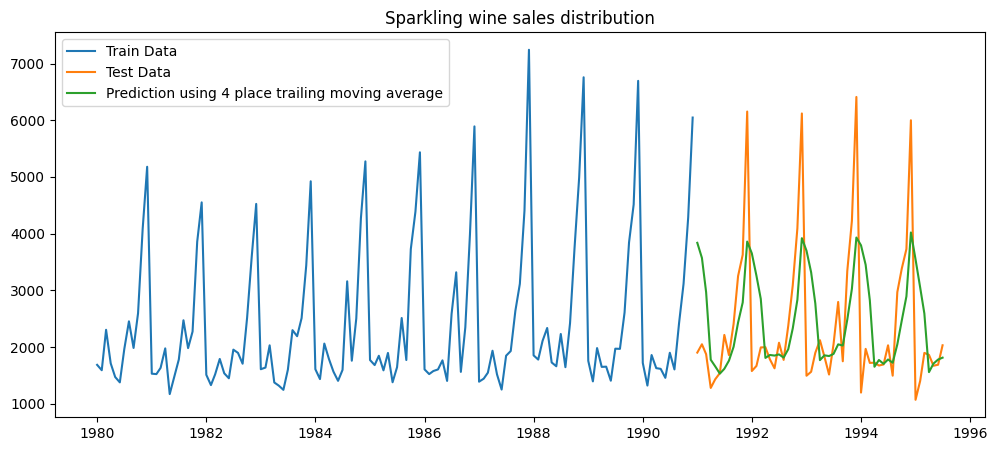

In [41]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling_ma_train_df['Sparkling'], label = 'Train Data')
plt.plot(sparkling_ma_test_df['Sparkling'], label = 'Test Data')
plt.plot(sparkling_ma_test_df['Trailing_Moving_Average_4'], label = 'Prediction using 4 place trailing moving average')
plt.plot()
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

In [42]:
rmse_ma_4_test = root_mean_squared_error(sparkling_ma_test_df['Sparkling'], sparkling_ma_test_df['Trailing_Moving_Average_4'])
error_4_tma = pd.DataFrame({'Prediction_error_on_Test_Data': [rmse_ma_4_test]}, index = ['4 Place Trailing Moving Average'])
error_df = pd.concat([error_df, error_4_tma])
error_df

,Prediction_error_on_Test_Data
Linear Regression,1389.135175
Simple Average,1275.081804
2 Place Trailing Moving Average,813.400684
4 Place Trailing Moving Average,1156.589694


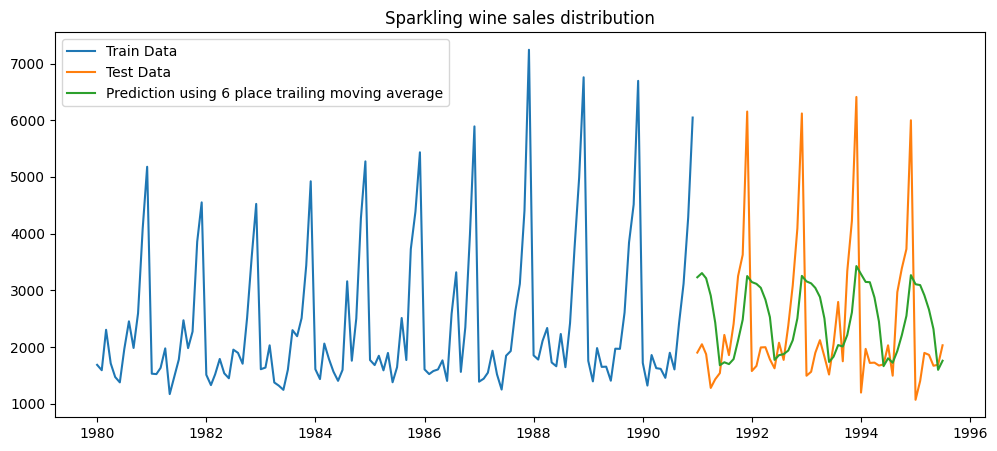

In [43]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling_ma_train_df['Sparkling'], label = 'Train Data')
plt.plot(sparkling_ma_test_df['Sparkling'], label = 'Test Data')
plt.plot(sparkling_ma_test_df['Trailing_Moving_Average_6'], label = 'Prediction using 6 place trailing moving average')
plt.plot()
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

In [44]:
rmse_ma_6_test = root_mean_squared_error(sparkling_ma_test_df['Sparkling'], sparkling_ma_test_df['Trailing_Moving_Average_6'])
error_6_tma = pd.DataFrame({'Prediction_error_on_Test_Data': [rmse_ma_6_test]}, index = ['6 Place Trailing Moving Average'])
error_df = pd.concat([error_df, error_6_tma])
error_df

,Prediction_error_on_Test_Data
Linear Regression,1389.135175
Simple Average,1275.081804
2 Place Trailing Moving Average,813.400684
4 Place Trailing Moving Average,1156.589694
6 Place Trailing Moving Average,1283.927428


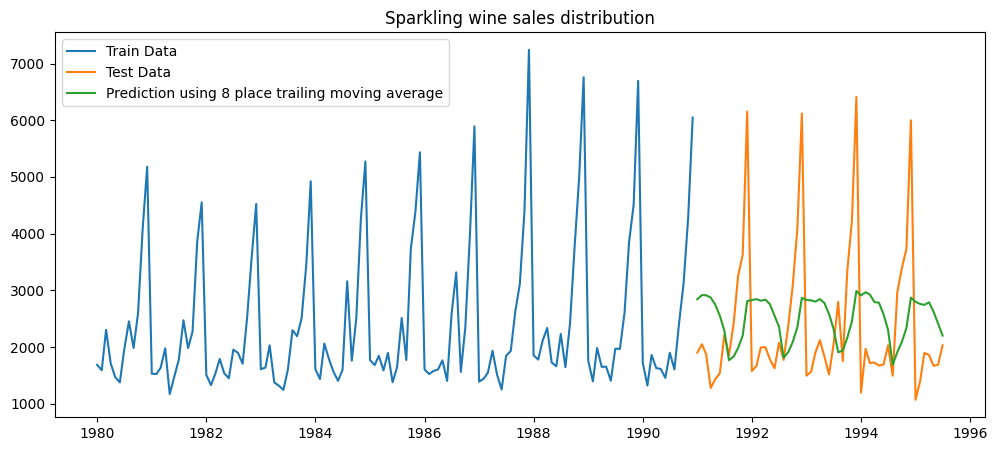

In [45]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling_ma_train_df['Sparkling'], label = 'Train Data')
plt.plot(sparkling_ma_test_df['Sparkling'], label = 'Test Data')
plt.plot(sparkling_ma_test_df['Trailing_Moving_Average_8'], label = 'Prediction using 8 place trailing moving average')
plt.plot()
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

In [46]:
rmse_ma_8_test = root_mean_squared_error(sparkling_ma_test_df['Sparkling'], sparkling_ma_test_df['Trailing_Moving_Average_8'])
error_8_tma = pd.DataFrame({'Prediction_error_on_Test_Data': [rmse_ma_8_test]}, index = ['8 Place Trailing Moving Average'])
error_df = pd.concat([error_df, error_8_tma])
error_df

,Prediction_error_on_Test_Data
Linear Regression,1389.135175
Simple Average,1275.081804
2 Place Trailing Moving Average,813.400684
4 Place Trailing Moving Average,1156.589694
6 Place Trailing Moving Average,1283.927428
8 Place Trailing Moving Average,1342.567772


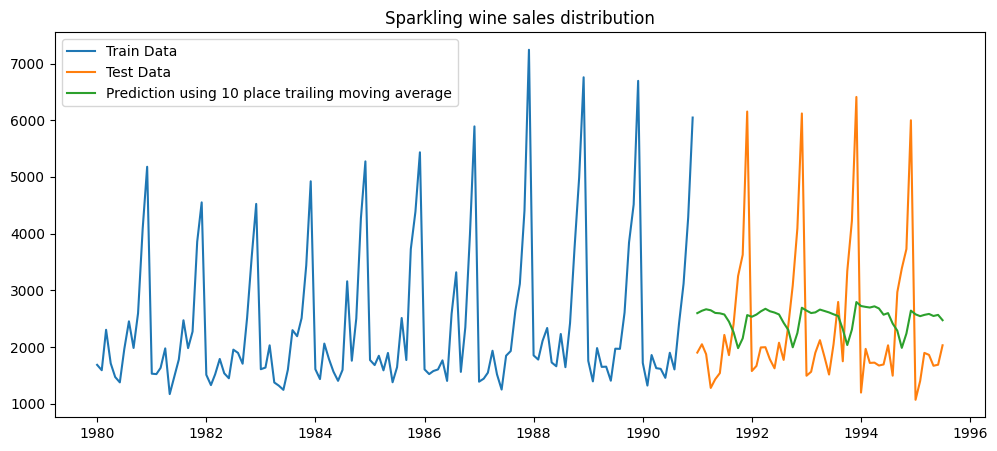

In [47]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling_ma_train_df['Sparkling'], label = 'Train Data')
plt.plot(sparkling_ma_test_df['Sparkling'], label = 'Test Data')
plt.plot(sparkling_ma_test_df['Trailing_Moving_Average_10'], label = 'Prediction using 10 place trailing moving average')
plt.plot()
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

In [48]:
rmse_ma_10_test = root_mean_squared_error(sparkling_ma_test_df['Sparkling'], sparkling_ma_test_df['Trailing_Moving_Average_10'])
error_10_tma = pd.DataFrame({'Prediction_error_on_Test_Data': [rmse_ma_10_test]}, index = ['10 Place Trailing Moving Average'])
error_df = pd.concat([error_df, error_10_tma])
error_df

,Prediction_error_on_Test_Data
Linear Regression,1389.135175
Simple Average,1275.081804
2 Place Trailing Moving Average,813.400684
4 Place Trailing Moving Average,1156.589694
6 Place Trailing Moving Average,1283.927428
8 Place Trailing Moving Average,1342.567772
10 Place Trailing Moving Average,1337.748838


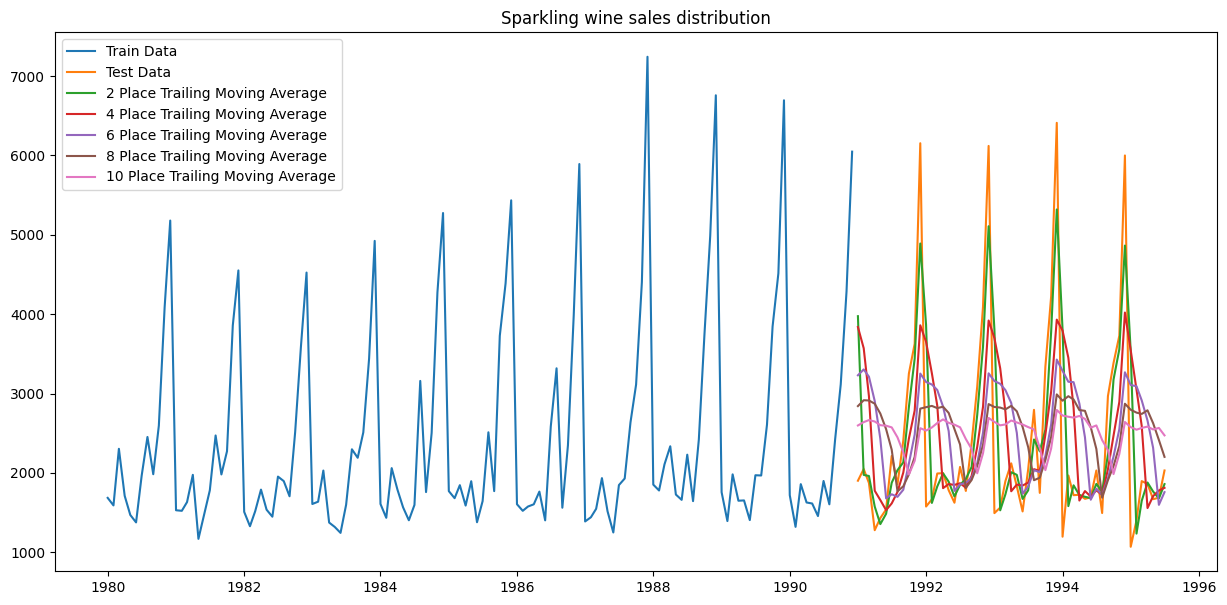

In [49]:
plt.figure(figsize = (15, 7))
plt.plot(sparkling_ma_train_df['Sparkling'], label = 'Train Data')
plt.plot(sparkling_ma_test_df['Sparkling'], label = 'Test Data')
plt.plot(sparkling_ma_test_df['Trailing_Moving_Average_2'], label = '2 Place Trailing Moving Average')
plt.plot(sparkling_ma_test_df['Trailing_Moving_Average_4'], label = '4 Place Trailing Moving Average')
plt.plot(sparkling_ma_test_df['Trailing_Moving_Average_6'], label = '6 Place Trailing Moving Average')
plt.plot(sparkling_ma_test_df['Trailing_Moving_Average_8'], label = '8 Place Trailing Moving Average')
plt.plot(sparkling_ma_test_df['Trailing_Moving_Average_10'], label = '10 Place Trailing Moving Average')
plt.plot()
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

**Exponential Smoothing**

In [50]:
sparkling_sm_train_df = sparkling_train_df.copy()
sparkling_sm_train_df.drop('time', axis = 1, inplace = True)
sparkling_sm_train_df

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116


In [51]:
sparkling_sm_test_df = sparkling_test_df.copy()
sparkling_sm_test_df.drop('time', axis = 1, inplace = True)
sparkling_sm_test_df

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432
1991-06-01,1540
1991-07-01,2214
1991-08-01,1857
1991-09-01,2408


In [52]:
# SimpleExpSmoothing

model_ses = SimpleExpSmoothing(sparkling_sm_train_df, initialization_method = 'estimated')
model_ses = model_ses.fit(optimized = True)
model_ses.params

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': np.float64(0.07028781460389563),
 'smoothing_trend': np.float64(nan),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': nan,
 'initial_level': np.float64(1763.9269926897732),
 'initial_trend': np.float64(nan),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

* smoothing_level	= 0.0703 :
	* Controls how much weight is given to the most recent observation when updating the level.
	* A small value (~0.07) means the model updates the level very slowly, giving much more weight to the historical level than to recent data.
	* This is ideal when the data has a stable pattern with random noise.

* initial_level =	1763.93 :
	* This is the initial estimate of the level (starting point) of the time series before any updates.
	* It serves as the base value from which the model begins forecasting.

* smoothing_trend = nan :
	 * nan means that the trend component is not included.
	 * The model assumes the series has no consistent upward or downward slope over time.

* smoothing_seasonal = nan :
	 * nan indicates that the seasonality component is not included.
	 * The model assumes no repeating seasonal patterns.


In [53]:
ses_predict = model_ses.forecast(steps = len(sparkling_sm_test_df))
ses_predict

,0
1991-01-01,2804.662714
1991-02-01,2804.662714
1991-03-01,2804.662714
1991-04-01,2804.662714
1991-05-01,2804.662714
1991-06-01,2804.662714
1991-07-01,2804.662714
1991-08-01,2804.662714
1991-09-01,2804.662714
1991-10-01,2804.662714


In [54]:
sparkling_sm_test_df['ses_predict'] = ses_predict
sparkling_sm_test_df

,Sparkling,ses_predict
YearMonth,,
1991-01-01,1902,2804.662714
1991-02-01,2049,2804.662714
1991-03-01,1874,2804.662714
1991-04-01,1279,2804.662714
1991-05-01,1432,2804.662714
1991-06-01,1540,2804.662714
1991-07-01,2214,2804.662714
1991-08-01,1857,2804.662714
1991-09-01,2408,2804.662714


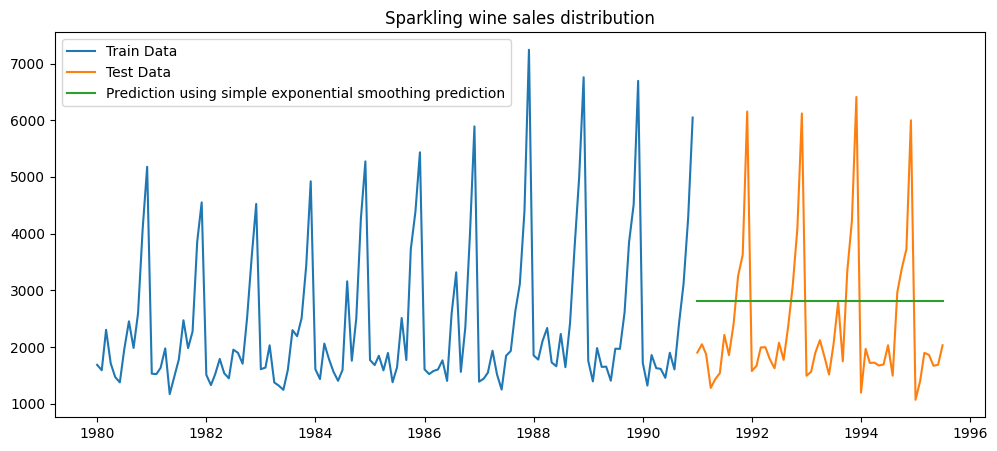

In [55]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling_sm_train_df['Sparkling'], label = 'Train Data')
plt.plot(sparkling_sm_test_df['Sparkling'], label = 'Test Data')
plt.plot(sparkling_sm_test_df['ses_predict'], label = 'Prediction using simple exponential smoothing prediction')
plt.plot()
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

In [56]:
rmse_ses_test = root_mean_squared_error(sparkling_sm_test_df['Sparkling'], sparkling_sm_test_df['ses_predict'])
error_ses = pd.DataFrame({'Prediction_error_on_Test_Data': [rmse_ses_test]}, index = ['Simple Exponential Smoothing with smoothing_level: 0.07028781460389563'])
error_df = pd.concat([error_df, error_ses])
error_df

,Prediction_error_on_Test_Data
Linear Regression,1389.135175
Simple Average,1275.081804
2 Place Trailing Moving Average,813.400684
4 Place Trailing Moving Average,1156.589694
6 Place Trailing Moving Average,1283.927428
8 Place Trailing Moving Average,1342.567772
10 Place Trailing Moving Average,1337.748838
Simple Exponential Smoothing with smoothing_level: 0.07028781460389563,1338.004623


In [57]:
# Holt's Linear Trend Model

model_holt = Holt(sparkling_sm_train_df, initialization_method = 'estimated')
model_holt = model_holt.fit(optimized = True)
model_holt.params

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': np.float64(0.6649999999999999),
 'smoothing_trend': np.float64(0.0001),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': nan,
 'initial_level': np.float64(1502.1999999999998),
 'initial_trend': np.float64(74.87272727272733),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

* **smoothing_level = 0.665** :
    * Controls how much weight is given to the most recent observation when updating the level.
    * A value close to 1 means recent data heavily influence the level; a value closer to 0 gives more weight to older data.
    * Here, 66.5% of the weight is given to the newest data, making level updates moderately responsive.

* **initial_level = 1502.20** :
	* The starting point (baseline value) of the time series before any updates.
	* The model assumes the series started at this value.

* **smoothing_trend	= 0.0001** :
	* Controls how much weight is given to the new trend information.
	* A value of 0.0001 is extremely small, meaning the trend is almost fixed and not significantly updated over time.
	* The model relies mostly on the initial_trend for forecasting the future slope.

* **initial_trend = 74.87** :
	* The initial slope, or the rate of change, estimated at the beginning of the series.
	* The model starts by assuming the series grows by ~74.87 units per time step. Combined with smoothing_trend, this trend is updated (minimally, in this case) over time.

* **smoothing_seasonal = nan** :
	* Seasonality is not included in this model.
	* The model does not expect any repeating seasonal patterns in the data.







In [58]:
holt_predict = model_holt.forecast(steps = len(sparkling_sm_test_df))
holt_predict

,0
1991-01-01,5401.733026
1991-02-01,5476.005230
1991-03-01,5550.277433
1991-04-01,5624.549637
1991-05-01,5698.821840
1991-06-01,5773.094044
1991-07-01,5847.366248
1991-08-01,5921.638451
1991-09-01,5995.910655
1991-10-01,6070.182858


In [59]:
sparkling_sm_test_df['holt_predict'] = holt_predict
sparkling_sm_test_df

,Sparkling,ses_predict,holt_predict
YearMonth,,,
1991-01-01,1902,2804.662714,5401.733026
1991-02-01,2049,2804.662714,5476.005230
1991-03-01,1874,2804.662714,5550.277433
1991-04-01,1279,2804.662714,5624.549637
1991-05-01,1432,2804.662714,5698.821840
1991-06-01,1540,2804.662714,5773.094044
1991-07-01,2214,2804.662714,5847.366248
1991-08-01,1857,2804.662714,5921.638451
1991-09-01,2408,2804.662714,5995.910655


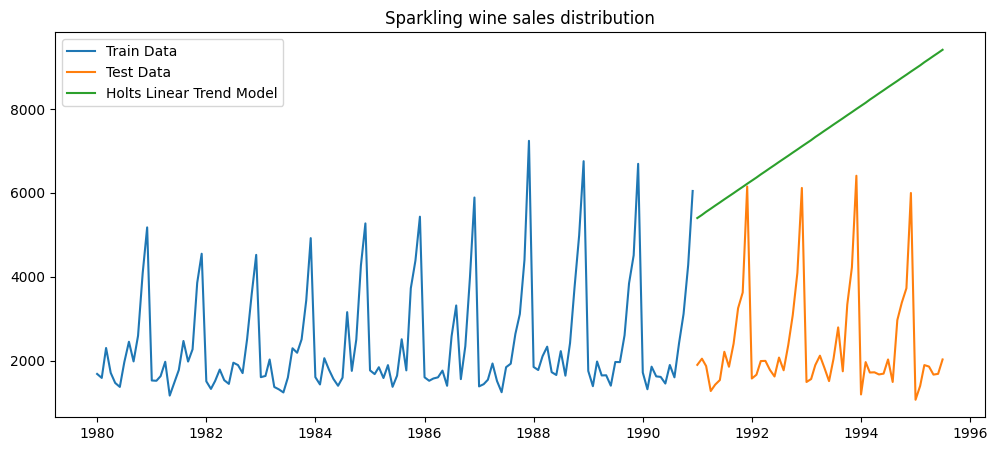

In [60]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling_sm_train_df['Sparkling'], label = 'Train Data')
plt.plot(sparkling_sm_test_df['Sparkling'], label = 'Test Data')
plt.plot(sparkling_sm_test_df['holt_predict'], label = 'Holts Linear Trend Model')
plt.plot()
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

In [61]:
rmse_holt_test = root_mean_squared_error(sparkling_sm_test_df['Sparkling'], sparkling_sm_test_df['holt_predict'])
error_holt = pd.DataFrame({'Prediction_error_on_Test_Data': [rmse_holt_test]}, index = ['Holts Linear Trend Model with smoothing_level: 0.6649 & smoothing_trend: 0.0001'])
error_df = pd.concat([error_df, error_holt])
error_df

,Prediction_error_on_Test_Data
Linear Regression,1389.135175
Simple Average,1275.081804
2 Place Trailing Moving Average,813.400684
4 Place Trailing Moving Average,1156.589694
6 Place Trailing Moving Average,1283.927428
8 Place Trailing Moving Average,1342.567772
10 Place Trailing Moving Average,1337.748838
Simple Exponential Smoothing with smoothing_level: 0.07028781460389563,1338.004623
Holts Linear Trend Model with smoothing_level: 0.6649 & smoothing_trend: 0.0001,5291.879833


In [62]:
# Holt Winters Seasonal Model(Triple Exponential Smoothing with Additive Trend & Additive Seasonality)

model_tes = ExponentialSmoothing(sparkling_sm_train_df, trend = 'additive', seasonal = 'additive', initialization_method = 'estimated')
model_tes = model_tes.fit(optimized = True)
model_tes.params

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': np.float64(0.11127217859992398),
 'smoothing_trend': np.float64(0.01236078328796452),
 'smoothing_seasonal': np.float64(0.4607177642170641),
 'damping_trend': nan,
 'initial_level': np.float64(2356.578308185137),
 'initial_trend': np.float64(-0.01853556812789492),
 'initial_seasons': array([-636.23360535, -722.98363367, -398.6436108 , -473.43084469,
        -808.42525514, -815.35024951, -384.23066987,   72.99508063,
        -237.44272911,  272.32584554, 1541.3782103 , 2590.0775386 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

* **smoothing_level = 0.1113** :
  * Controls how much weight is given to the most recent data in updating the level component.
  * A value of ~0.11 means the level is updated slowly, giving more weight to the historical average than recent observations.

* **initial_level = 2356.58** :
  * The initial estimate of the level — the starting point of the time series.
  * All forecasts are built upon this base.

* **smoothing_trend = 0.0124** :
  * Controls the weight on updating the trend component.
  * A very small value (~0.012) means the trend changes very slowly over time and the model mostly relies on the initial trend.

* **initial_trend = -0.0185** :
  * The initial slope of the trend.
  * A small negative value indicates a very slight downward trend at the beginning of the series.

* **smoothing_seasonal = 0.4607** :
  * Controls how much the seasonal component is updated with each new observation.
  * A value of ~0.46 is moderately high, meaning the seasonal pattern is adaptively updated, but still considers past seasonal values.

* **initial_seasons	array([...]) = [-636.23, -722.98, -398.64, -473.43, -808.43, -815.35, -384.23, 73.00, -237.44, 272.33, 1541.38, 2590.08]** :
  * There are 12 values, indicating monthly seasonality.
  * Each value represents the estimated seasonal effect for a specific month.
  * These are additive adjustments that get added or subtracted from the forecast depending on the season (e.g., month).

In [63]:
tes_predict = model_tes.forecast(steps = len(sparkling_sm_test_df))
tes_predict

,0
1991-01-01,1490.574426
1991-02-01,1204.714325
1991-03-01,1688.941106
1991-04-01,1551.450810
1991-05-01,1461.440427
1991-06-01,1278.907163
1991-07-01,1805.164022
1991-08-01,1679.251392
1991-09-01,2315.687649
1991-10-01,3225.308906


In [64]:
sparkling_sm_test_df['tes_predict'] = tes_predict
sparkling_sm_test_df

,Sparkling,ses_predict,holt_predict,tes_predict
YearMonth,,,,
1991-01-01,1902,2804.662714,5401.733026,1490.574426
1991-02-01,2049,2804.662714,5476.005230,1204.714325
1991-03-01,1874,2804.662714,5550.277433,1688.941106
1991-04-01,1279,2804.662714,5624.549637,1551.450810
1991-05-01,1432,2804.662714,5698.821840,1461.440427
1991-06-01,1540,2804.662714,5773.094044,1278.907163
1991-07-01,2214,2804.662714,5847.366248,1805.164022
1991-08-01,1857,2804.662714,5921.638451,1679.251392
1991-09-01,2408,2804.662714,5995.910655,2315.687649


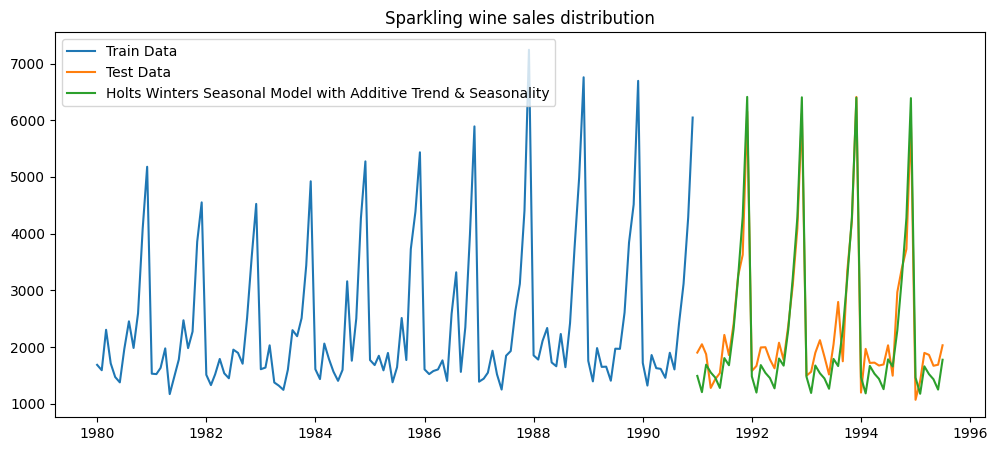

In [65]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling_sm_train_df['Sparkling'], label = 'Train Data')
plt.plot(sparkling_sm_test_df['Sparkling'], label = 'Test Data')
plt.plot(sparkling_sm_test_df['tes_predict'], label = 'Holts Winters Seasonal Model with Additive Trend & Seasonality')
plt.plot()
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

In [66]:
rmse_tes_test = root_mean_squared_error(sparkling_sm_test_df['Sparkling'], sparkling_sm_test_df['tes_predict'])
error_tes = pd.DataFrame({'Prediction_error_on_Test_Data': [rmse_tes_test]}, index = ['Holts Linear Trend Model with smoothing_level: 0.11127217859992398, smoothing_trend : 01236078328796452 & smoothing_seasonal: 0.4607177642170641'])
error_df = pd.concat([error_df, error_tes])
error_df

,Prediction_error_on_Test_Data
Linear Regression,1389.135175
Simple Average,1275.081804
2 Place Trailing Moving Average,813.400684
4 Place Trailing Moving Average,1156.589694
6 Place Trailing Moving Average,1283.927428
8 Place Trailing Moving Average,1342.567772
10 Place Trailing Moving Average,1337.748838
Simple Exponential Smoothing with smoothing_level: 0.07028781460389563,1338.004623
Holts Linear Trend Model with smoothing_level: 0.6649 & smoothing_trend: 0.0001,5291.879833
"Holts Linear Trend Model with smoothing_level: 0.11127217859992398, smoothing_trend : 01236078328796452 & smoothing_seasonal: 0.4607177642170641",378.626241


In [67]:
# Holt Winters Seasonal Model(Triple Exponential Smoothing with Additive Trend & Multiplicative Seasonality)

model_tes_aam = ExponentialSmoothing(sparkling_sm_train_df, trend = 'additive', seasonal = 'multiplicative', initialization_method = 'estimated')
model_tes_aam = model_tes_aam.fit(optimized = True)
model_tes_aam.params

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': np.float64(0.11119949831569428),
 'smoothing_trend': np.float64(0.049430920023313805),
 'smoothing_seasonal': np.float64(0.3620525701498937),
 'damping_trend': nan,
 'initial_level': np.float64(2356.5264391986907),
 'initial_trend': np.float64(-9.443690175376352),
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

* **smoothing_level = 0.1112** :
  * Controls how quickly the level of the series responds to changes.
  * A value of 0.11 means the model updates the level slowly, smoothing out short-term fluctuations.

* **initial_level = 2356.53**	:
  * The starting point (base value) for the level of the time series before applying any updates or trends.

* **smoothing_trend = 0.0494** :
  * Controls how fast the trend component is updated.
  * A small value (~0.049) indicates a slow adjustment to changes in trend — the model trusts the original trend more than recent changes.

* **initial_trend = -9.44** :
  * The initial slope of the trend, indicating the data was decreasing at the rate of ~9.44 units per time period at the beginning.
  * A negative value = downward trend.

* **smoothing_seasonal = 0.3621** :
  * Controls how quickly the seasonal pattern is updated.
  * A value of ~0.36 is moderate, indicating the model adjusts seasonality moderately in response to new data.

* **initial_seasons	array([...]) = [0.71, 0.68, 0.91, 0.801, 0.66, 0.66, 0.89, 1.13, 0.92, 1.21, 1.87, 2.37]** :
  * This array holds seasonal indices for each time step in the seasonal cycle (likely 12 months).
  * Values around 1.0 suggest a multiplicative seasonal component, where each period's forecast is multiplied by these values to account for seasonal effects.

In [68]:
tes_aam_predict = model_tes_aam.forecast(steps = len(sparkling_sm_test_df))
tes_aam_predict

,0
1991-01-01,1587.685845
1991-02-01,1356.590237
1991-03-01,1763.121866
1991-04-01,1656.379813
1991-05-01,1542.186697
1991-06-01,1355.276292
1991-07-01,1854.460265
1991-08-01,1820.822870
1991-09-01,2277.203230
1991-10-01,3122.460625


In [69]:
sparkling_sm_test_df['tes_aam_predict'] = tes_aam_predict
sparkling_sm_test_df

,Sparkling,ses_predict,holt_predict,tes_predict,tes_aam_predict
YearMonth,,,,,
1991-01-01,1902,2804.662714,5401.733026,1490.574426,1587.685845
1991-02-01,2049,2804.662714,5476.005230,1204.714325,1356.590237
1991-03-01,1874,2804.662714,5550.277433,1688.941106,1763.121866
1991-04-01,1279,2804.662714,5624.549637,1551.450810,1656.379813
1991-05-01,1432,2804.662714,5698.821840,1461.440427,1542.186697
1991-06-01,1540,2804.662714,5773.094044,1278.907163,1355.276292
1991-07-01,2214,2804.662714,5847.366248,1805.164022,1854.460265
1991-08-01,1857,2804.662714,5921.638451,1679.251392,1820.822870
1991-09-01,2408,2804.662714,5995.910655,2315.687649,2277.203230


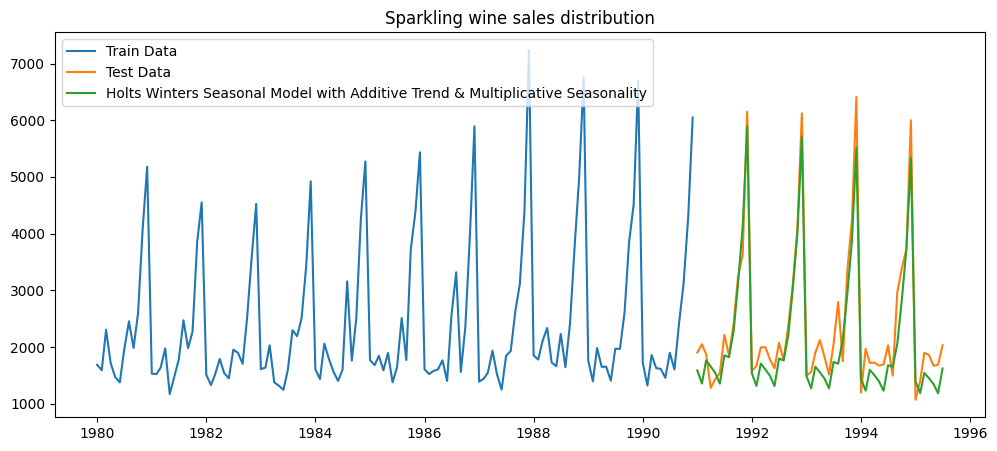

In [70]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling_sm_train_df['Sparkling'], label = 'Train Data')
plt.plot(sparkling_sm_test_df['Sparkling'], label = 'Test Data')
plt.plot(sparkling_sm_test_df['tes_aam_predict'], label = 'Holts Winters Seasonal Model with Additive Trend & Multiplicative Seasonality')
plt.plot()
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

In [71]:
rmse_tes_aam_test = root_mean_squared_error(sparkling_sm_test_df['Sparkling'], sparkling_sm_test_df['tes_aam_predict'])
error_tes_aam = pd.DataFrame({'Prediction_error_on_Test_Data': [rmse_tes_aam_test]}, index = ['Holts Linear Trend Model with additive trend and multiplicative sesonal - smoothing_level: 0.11119949831569428, smoothing_trend : 0.049430920023313805 & smoothing_seasonal: 0.3620525701498937'])
error_df = pd.concat([error_df, error_tes_aam])
error_df.sort_values(by = 'Prediction_error_on_Test_Data', ascending = True)

,Prediction_error_on_Test_Data
"Holts Linear Trend Model with smoothing_level: 0.11127217859992398, smoothing_trend : 01236078328796452 & smoothing_seasonal: 0.4607177642170641",378.626241
"Holts Linear Trend Model with additive trend and multiplicative sesonal - smoothing_level: 0.11119949831569428, smoothing_trend : 0.049430920023313805 & smoothing_seasonal: 0.3620525701498937",403.706228
2 Place Trailing Moving Average,813.400684
4 Place Trailing Moving Average,1156.589694
Simple Average,1275.081804
6 Place Trailing Moving Average,1283.927428
10 Place Trailing Moving Average,1337.748838
Simple Exponential Smoothing with smoothing_level: 0.07028781460389563,1338.004623
8 Place Trailing Moving Average,1342.567772
Linear Regression,1389.135175


**ARIMA Model**

In [72]:
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [73]:
sparkling3_train_df = sparkling_df[:'1990-12-01']
sparkling3_test_df = sparkling_df['1991-01-01':]

In [74]:
# Augmented Dickey Fuller Test

adtest = adfuller(sparkling3_train_df, regression = 'ct')

print(f"adfuller test statistics is {adtest[0]}")
print(f"adfuller test p-value is {adtest[1]}")
print(f"Number of lags used - {adtest[2]}")

adfuller test statistics is -2.061798126187548
adfuller test p-value is 0.5674110388593714
Number of lags used - 12


* The ADF (Augmented Dickey-Fuller) test is a statistical test used to determine whether a time series is stationary or not.

* A time series is stationary if its Mean, Variance & Autocorrelation remain constant over time. In simple terms, stationary data does not have trends or seasonality, and its behavior stays consistent.

* The ADF test checks for a unit root in the time series.
  * If a unit root is present, the series is non-stationary.
  * If there is no unit root, the series is stationary.

* Hypotheses in ADF Test:
  * H0 : The series has a unit root which means that the series non-stationary.
  * H1 : The is no unit root which means that the series is stationary.


* Here P-value is 0.57 which is greater than 0.05, which means data is accepting the null hypothesis, which means data is non-stationary.

In [75]:
# Performing one level of differencing to check whether the Time Series becomes stationary

adtest = adfuller(sparkling3_train_df.diff().dropna(), regression = 'ct')

print(f"adfuller test statistics is {adtest[0]}")
print(f"adfuller test p-value is {adtest[1]}")
print(f"Number of lags used - {adtest[2]}")

adfuller test statistics is -7.9678421962555435
adfuller test p-value is 8.4792106555143e-11
Number of lags used - 11


* Here P-value is 8.4792106555143e-11, which means we will be rejecting the null hypothesis. So data is stationary.

* Therefore d (degree of differencing to make the series stationary) = 1

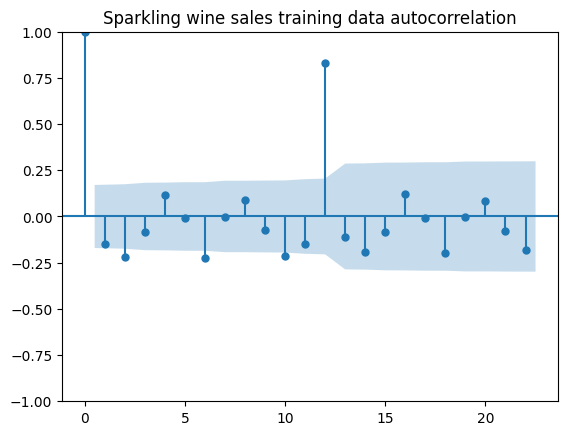

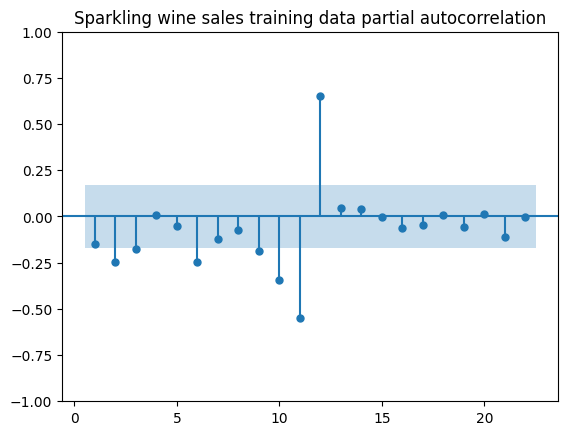

In [76]:
plot_acf(sparkling3_train_df.diff(), title='Sparkling wine sales training data autocorrelation',missing='drop')
plot_pacf(sparkling3_train_df.diff().dropna(),title='Sparkling wine sales training data partial autocorrelation',zero=False,method='ywmle')
plt.show()

From ACF & PACF plot :
  * Number of lag observations included (i.e., how many previous time steps are used to predict the current value) is 3. Therefore p = 3.

  *  Number of lagged forecast errors in the prediction forecast is 2. Therefore q = 2

In [77]:
from statsmodels.tsa.arima.model import ARIMA

pdq = (3, 1, 2)

manual_ARIMA_model = ARIMA(sparkling3_train_df['Sparkling'], order = pdq).fit()

print(manual_ARIMA_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.681
Date:                Wed, 21 May 2025   AIC                           2231.363
Time:                        09:06:50   BIC                           2248.614
Sample:                    01-01-1980   HQIC                          2238.373
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4371      0.053     -8.210      0.000      -0.541      -0.333
ar.L2          0.3311      0.131      2.531      0.011       0.075       0.588
ar.L3         -0.2317      0.079     -2.945      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [78]:
print('ARIMA {} - AIC : {}'.format(pdq, manual_ARIMA_model.aic))

ARIMA (3, 1, 2) - AIC : 2231.362623820294


In [79]:
predicted_sparkling_wine_sales = manual_ARIMA_model.forecast(steps = len(sparkling3_test_df))
sparkling3_test_df['predicted_sparkling_wine_sales_using_arima_model'] = predicted_sparkling_wine_sales

sparkling3_test_df

<ipython-input-79-45e16895d04b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sparkling3_test_df['predicted_sparkling_wine_sales_using_arima_model'] = predicted_sparkling_wine_sales


,Sparkling,predicted_sparkling_wine_sales_using_arima_model
YearMonth,,
1991-01-01,1902,3857.369796
1991-02-01,2049,2801.679242
1991-03-01,1874,2130.041062
1991-04-01,1279,2581.452369
1991-05-01,1432,2406.345085
1991-06-01,1540,2788.003408
1991-07-01,2214,2458.578142
1991-08-01,1857,2769.540642
1991-09-01,2408,2436.082768


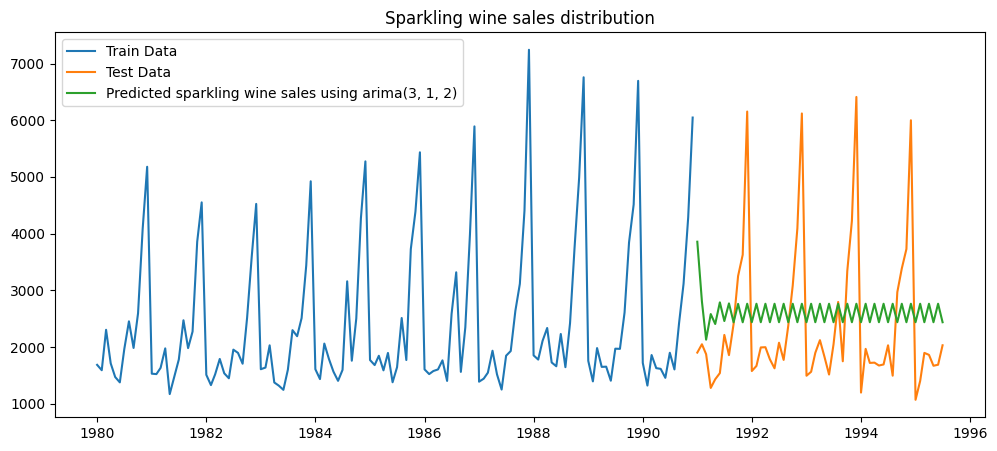

In [80]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling3_train_df['Sparkling'], label = 'Train Data')
plt.plot(sparkling3_test_df['Sparkling'], label = 'Test Data')
plt.plot(sparkling3_test_df['predicted_sparkling_wine_sales_using_arima_model'], label = 'Predicted sparkling wine sales using arima(3, 1, 2)')
plt.plot()
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

In [81]:
rmse_manual_arima_test = root_mean_squared_error(sparkling3_test_df['Sparkling'], sparkling3_test_df['predicted_sparkling_wine_sales_using_arima_model'])
error_arima_aam = pd.DataFrame({'Prediction_error_on_Test_Data': [rmse_manual_arima_test]}, index = ['Predicted sparkling wine sales using arima model(p = 3, d = 1, q = 2)'])
error_df = pd.concat([error_df, error_arima_aam])
error_df.sort_values(by = 'Prediction_error_on_Test_Data', ascending = True)

,Prediction_error_on_Test_Data
"Holts Linear Trend Model with smoothing_level: 0.11127217859992398, smoothing_trend : 01236078328796452 & smoothing_seasonal: 0.4607177642170641",378.626241
"Holts Linear Trend Model with additive trend and multiplicative sesonal - smoothing_level: 0.11119949831569428, smoothing_trend : 0.049430920023313805 & smoothing_seasonal: 0.3620525701498937",403.706228
2 Place Trailing Moving Average,813.400684
4 Place Trailing Moving Average,1156.589694
Simple Average,1275.081804
6 Place Trailing Moving Average,1283.927428
"Predicted sparkling wine sales using arima model(p = 3, d = 1, q = 2)",1290.605004
10 Place Trailing Moving Average,1337.748838
Simple Exponential Smoothing with smoothing_level: 0.07028781460389563,1338.004623
8 Place Trailing Moving Average,1342.567772


**SARIMAX Model**

In [82]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

manual_SARIMA_model = SARIMAX(sparkling3_train_df['Sparkling'], order=(3,1,2), seasonal_order=(0, 0, 3, 6)).fit(maxiter=1000)

print(manual_SARIMA_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                         SARIMAX Results                                         
Dep. Variable:                                 Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(0, 0, [1, 2, 3], 6)   Log Likelihood               -1062.459
Date:                                   Wed, 21 May 2025   AIC                           2142.918
Time:                                           09:06:56   BIC                           2168.795
Sample:                                       01-01-1980   HQIC                          2153.433
                                            - 12-01-1990                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5752      8.970     -0.064      0.949    

In [83]:
print('SARIMA (3, 1, 2)x(0, 0, 3, 6) - AIC : {}'.format(manual_SARIMA_model.aic))

SARIMA (3, 1, 2)x(0, 0, 3, 6) - AIC : 2142.9184576374373


In [84]:
predicted_sparkling_wine_sales = manual_SARIMA_model.forecast(steps = len(sparkling3_test_df))
sparkling3_test_df['predicted_sparkling_wine_sales_using_manual_sarima_model'] = predicted_sparkling_wine_sales

sparkling3_test_df

<ipython-input-84-0fd648e00c9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sparkling3_test_df['predicted_sparkling_wine_sales_using_manual_sarima_model'] = predicted_sparkling_wine_sales


,Sparkling,predicted_sparkling_wine_sales_using_arima_model,predicted_sparkling_wine_sales_using_manual_sarima_model
YearMonth,,,
1991-01-01,1902,3857.369796,2406.805644
1991-02-01,2049,2801.679242,1768.489163
1991-03-01,1874,2130.041062,2356.476391
1991-04-01,1279,2581.452369,2508.319480
1991-05-01,1432,2406.345085,1895.073740
1991-06-01,1540,2788.003408,2052.300002
1991-07-01,2214,2458.578142,2457.928221
1991-08-01,1857,2769.540642,2136.293439
1991-09-01,2408,2436.082768,2056.650868


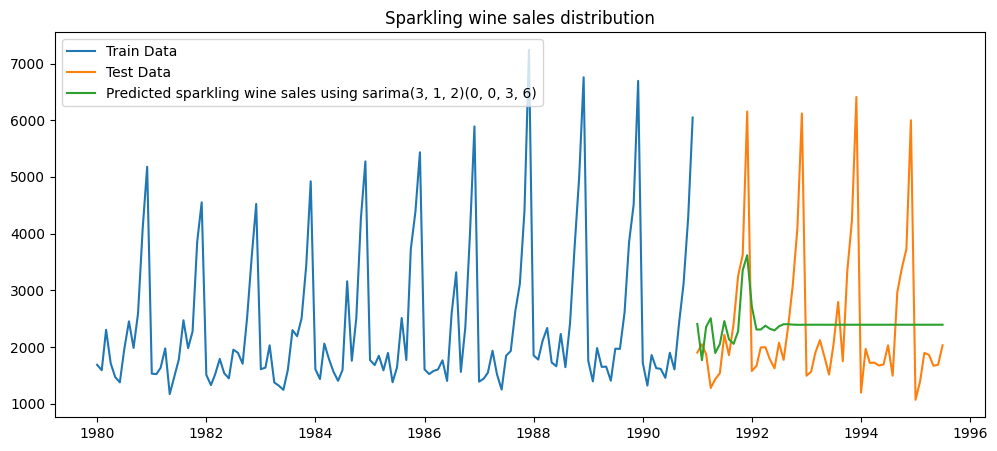

In [85]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling3_train_df['Sparkling'], label = 'Train Data')
plt.plot(sparkling3_test_df['Sparkling'], label = 'Test Data')
plt.plot(sparkling3_test_df['predicted_sparkling_wine_sales_using_manual_sarima_model'], label = 'Predicted sparkling wine sales using sarima(3, 1, 2)(0, 0, 3, 6)')
plt.plot()
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

In [86]:
rmse_manual_sarima_test = root_mean_squared_error(sparkling3_test_df['Sparkling'], sparkling3_test_df['predicted_sparkling_wine_sales_using_manual_sarima_model'])
error_arima_aam = pd.DataFrame({'Prediction_error_on_Test_Data': [rmse_manual_sarima_test]}, index = ['Predicted sparkling wine sales using manual sarima model(3, 1, 2)(0, 0, 3, 6)'])
error_df = pd.concat([error_df, error_arima_aam])
error_df.sort_values(by = 'Prediction_error_on_Test_Data', ascending = True)

,Prediction_error_on_Test_Data
"Holts Linear Trend Model with smoothing_level: 0.11127217859992398, smoothing_trend : 01236078328796452 & smoothing_seasonal: 0.4607177642170641",378.626241
"Holts Linear Trend Model with additive trend and multiplicative sesonal - smoothing_level: 0.11119949831569428, smoothing_trend : 0.049430920023313805 & smoothing_seasonal: 0.3620525701498937",403.706228
2 Place Trailing Moving Average,813.400684
4 Place Trailing Moving Average,1156.589694
"Predicted sparkling wine sales using manual sarima model(3, 1, 2)(0, 0, 3, 6)",1203.514114
Simple Average,1275.081804
6 Place Trailing Moving Average,1283.927428
"Predicted sparkling wine sales using arima model(p = 3, d = 1, q = 2)",1290.605004
10 Place Trailing Moving Average,1337.748838
Simple Exponential Smoothing with smoothing_level: 0.07028781460389563,1338.004623


**Auto ARIMA Model**

In [87]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Arima model -')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Arima model -
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [88]:
# Creating an empty Dataframe with column names only

ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [89]:
for param in pdq:
    auto_ARIMA_model = ARIMA(sparkling3_train_df['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, auto_ARIMA_model.aic))

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155921866
ARIMA(0, 1, 2) - AIC:2234.408323120734
ARIMA(0, 1, 3) - AIC:2233.9948577541245
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946796027


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC:2234.5272004515336
ARIMA(1, 1, 3) - AIC:2235.6078158404553
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626365689
ARIMA(2, 1, 2) - AIC:2213.509213363836


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.840420804614
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.500537802189


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2231.362623820294
ARIMA(3, 1, 3) - AIC:2221.455952727806


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [90]:
pdq = (2, 1, 2)

auto_ARIMA_model = ARIMA(sparkling3_train_df['Sparkling'], order = pdq).fit()

print(auto_ARIMA_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Wed, 21 May 2025   AIC                           2213.509
Time:                        09:06:59   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

In [91]:
print('ARIMA {} - AIC : {}'.format(pdq, auto_ARIMA_model.aic))

ARIMA (2, 1, 2) - AIC : 2213.509213363836


In [92]:
predicted_sparkling_wine_sales = auto_ARIMA_model.forecast(steps = len(sparkling3_test_df))
sparkling3_test_df['predicted_sparkling_wine_sales_using_auto_arima_model'] = predicted_sparkling_wine_sales

sparkling3_test_df

<ipython-input-92-ca461b8614c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sparkling3_test_df['predicted_sparkling_wine_sales_using_auto_arima_model'] = predicted_sparkling_wine_sales


,Sparkling,predicted_sparkling_wine_sales_using_arima_model,predicted_sparkling_wine_sales_using_manual_sarima_model,predicted_sparkling_wine_sales_using_auto_arima_model
YearMonth,,,,
1991-01-01,1902,3857.369796,2406.805644,4252.335308
1991-02-01,2049,2801.679242,1768.489163,2863.076607
1991-03-01,1874,2130.041062,2356.476391,2043.968285
1991-04-01,1279,2581.452369,2508.319480,1746.213678
1991-05-01,1432,2406.345085,1895.073740,1813.647534
1991-06-01,1540,2788.003408,2052.300002,2068.657414
1991-07-01,2214,2458.578142,2457.928221,2365.539942
1991-08-01,1857,2769.540642,2136.293439,2612.454610
1991-09-01,2408,2436.082768,2056.650868,2770.387843


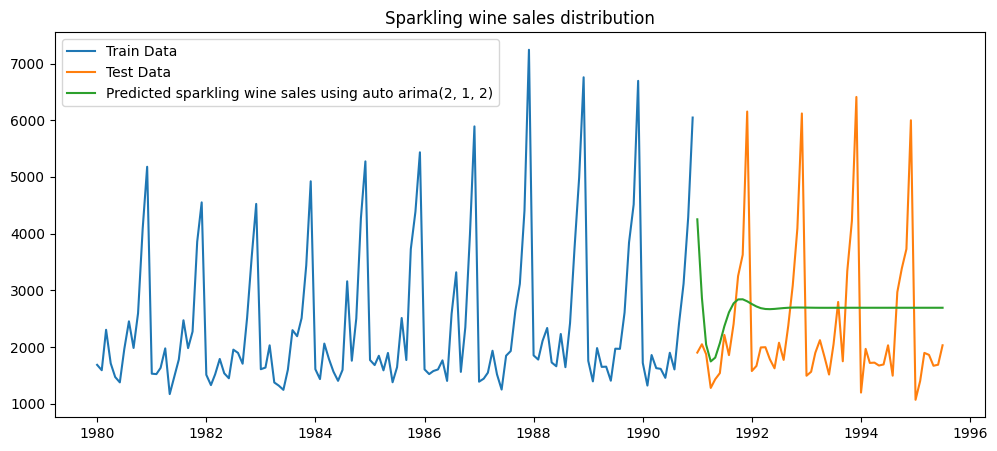

In [93]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling3_train_df['Sparkling'], label = 'Train Data')
plt.plot(sparkling3_test_df['Sparkling'], label = 'Test Data')
plt.plot(sparkling3_test_df['predicted_sparkling_wine_sales_using_auto_arima_model'], label = 'Predicted sparkling wine sales using auto arima(2, 1, 2)')
plt.plot()
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()

In [94]:
rmse_auto_arima_test = root_mean_squared_error(sparkling3_test_df['Sparkling'], sparkling3_test_df['predicted_sparkling_wine_sales_using_auto_arima_model'])
error_auto_arima = pd.DataFrame({'Prediction_error_on_Test_Data': [rmse_auto_arima_test]}, index = ['Predicted sparkling wine sales using auto arima model(p = 2, d = 1, q = 2)'])
error_df = pd.concat([error_df, error_auto_arima])
error_df.sort_values(by = 'Prediction_error_on_Test_Data', ascending = True)

,Prediction_error_on_Test_Data
"Holts Linear Trend Model with smoothing_level: 0.11127217859992398, smoothing_trend : 01236078328796452 & smoothing_seasonal: 0.4607177642170641",378.626241
"Holts Linear Trend Model with additive trend and multiplicative sesonal - smoothing_level: 0.11119949831569428, smoothing_trend : 0.049430920023313805 & smoothing_seasonal: 0.3620525701498937",403.706228
2 Place Trailing Moving Average,813.400684
4 Place Trailing Moving Average,1156.589694
"Predicted sparkling wine sales using manual sarima model(3, 1, 2)(0, 0, 3, 6)",1203.514114
Simple Average,1275.081804
6 Place Trailing Moving Average,1283.927428
"Predicted sparkling wine sales using arima model(p = 3, d = 1, q = 2)",1290.605004
"Predicted sparkling wine sales using auto arima model(p = 2, d = 1, q = 2)",1299.978216
10 Place Trailing Moving Average,1337.748838


Conclusion:

---


Among all models, **Holts Linear Trend Model with smoothing_level: 0.11, smoothing_trend : 0.12 & smoothing_seasonal: 0.46** is the best model having least prediction error on test data.

In [95]:
# Training Holt Winters Seasonal Model(Triple Exponential Smoothing with Additive Trend & Additive Seasonality) with the entire data

model_tes = ExponentialSmoothing(sparkling_df, trend = 'additive', seasonal = 'additive', initialization_method = 'estimated')
model_tes = model_tes.fit(optimized = True)
model_tes.params

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': np.float64(0.07596713707785278),
 'smoothing_trend': np.float64(0.0325692198217552),
 'smoothing_seasonal': np.float64(0.37660762989959706),
 'damping_trend': nan,
 'initial_level': np.float64(2356.5012332716906),
 'initial_trend': np.float64(-1.036745207736693),
 'initial_seasons': array([-636.253048  , -723.00015609, -398.67058104, -473.454497  ,
        -808.43188926, -815.36879572, -384.24762791,   72.99999114,
        -237.46119187,  272.34548171, 1541.39086828, 2590.11215318]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

* **smoothing_level = 0.07597** :
  * Controls the weight of the most recent observation in updating the level.
  * A low value (~0.076) means the level is updated slowly, making the model less reactive to short-term fluctuations.

* **initial_level = 2356.50** :
    * The starting point (baseline) of the level component of the time series.
    * It anchors the forecast at the beginning.

* **smoothing_trend = 0.03257** :
    * Controls how fast the trend component is updated.
    * A small value (~0.033) means the trend changes slowly over time.
    * The model trusts the initial trend more than incoming trend changes.

* **initial_trend = -1.0367** :
    * The initial slope of the trend component.
    * A negative value implies a slight downward trend at the start of the series.

* **smoothing_seasonal = 0.3766** :
    * Controls how quickly the seasonal component is updated.
    * A moderate value (~0.38) implies the seasonal pattern is somewhat adaptive, adjusting with moderate responsiveness to new data.

* **initial_seasons	array([...]) =  [-636.25, -723.00, -398.67, -473.45, -808.43, -815.37, -384.25, 73.00, -237.46, 272.35, 1541.39, 2590.11]**:
    * Represents the initial estimates of seasonal effects for each period in a 12-period cycle (likely monthly seasonality).
    * These values are additive adjustments, added to the forecast depending on the period.
    * The values vary widely, indicating strong seasonal effects (e.g., from -815 to +2590).

In [96]:
# Sparkling wine sales prediction for next 12 months.

tes_predict = model_tes.forecast(steps = 12)
tes_predict

,0
1995-08-01,1877.418941
1995-09-01,2405.272256
1995-10-01,3242.091547
1995-11-01,3922.174685
1995-12-01,6118.486847
1996-01-01,1262.602736
1996-02-01,1592.120955
1996-03-01,1831.635269
1996-04-01,1806.451672
1996-05-01,1651.704052


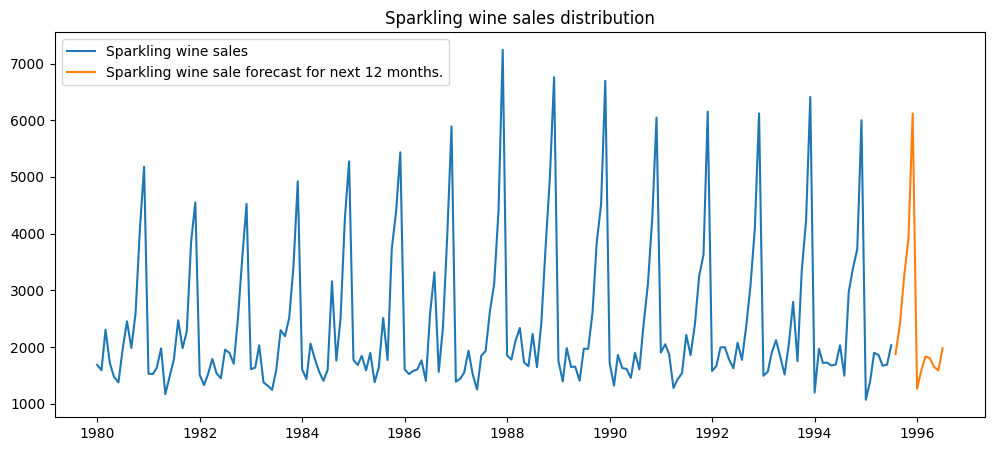

In [97]:
plt.figure(figsize = (12, 5))
plt.plot(sparkling_df['Sparkling'], label = 'Sparkling wine sales')
plt.plot(tes_predict, label = 'Sparkling wine sale forecast for next 12 months.')
plt.title('Sparkling wine sales distribution')
plt.legend(loc = 'best')
plt.show()